# Healthcare Lab (Simple Regression Model)

**Learning Objectives:**
  * Define and fit simple regression models
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [13]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt


In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [6]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [7]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

0        52.657084
1        52.657084
2        52.657084
3        52.657084
4        52.657084
           ...    
52558    80.637919
52559    70.258727
52560    70.258727
52561    70.258727
52562    70.258727
Name: AgeAtMedicalEvent, Length: 52563, dtype: float64

In [8]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

### 3. Impact of age on total costs
#### We are interested in determining the impact of age on the total cost of medical interventions. To do this we fit a simple model regressing the variable `AgeAtMedicalEvent` on 'TotalExpenses'

#### 3.1. Model Fit

In [14]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim').agg({'TotalExpenses':'sum','AgeAtMedicalEvent':'mean'})
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)

In [15]:
HealthCareDataSetGroupedByMedicalClaim

,TotalExpensesPerClaim,AgeAtMedicalEvent
MedicalClaim,,
0012a8eb3c2be5f5,4668.692,64.232717
002fd7d73d8060f1,53501.259,74.863792
003886fc8ec986d4,17115.714,64.380561
004fa1cd47f65193,3672.361,68.944559
005edafb00d0f6eb,2548.700,73.338809
...,...,...
ffbb520f6fd3b2c9,16743.412,73.691992
ffbd17c54f798c21,137173.701,83.219713
ffe2c14dfe865b6d,82255.586,82.663929


In [16]:
 #We impose a simple, linear, model:
# We specify TotalExpensesPerClaim as the response variable (a.k.a dependent variable). We set AgeAtMedicalEvent as the independent variable.

reg = smf.ols(formula='TotalExpensesPerClaim ~ AgeAtMedicalEvent', data=HealthCareDataSetGroupedByMedicalClaim)


In [17]:
 #We fit the model
results = reg.fit()


In [19]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept            4240.891553
AgeAtMedicalEvent     542.226020
dtype: float64



#### 3.2. Model Interpretation
##### Based on the previous we have fitted the following model:

$ TotalExpensesPerClaim=4240.89+542.22*AgeAtMedicalEvent+u $

#### This means that an increment of one unit in the variable `AgeAtMedicalEvent` increases the variable `TotalExpensesPerClaim` by 542.22 US Dollars.



<Axes: xlabel='AgeAtMedicalEvent', ylabel='TotalExpensesPerClaim'>

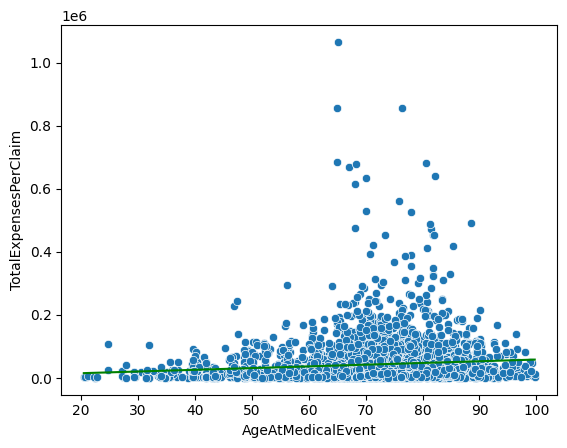

In [21]:
sns.scatterplot(data=HealthCareDataSetGroupedByMedicalClaim, x='AgeAtMedicalEvent',y='TotalExpensesPerClaim')

sns.lineplot(data=HealthCareDataSetGroupedByMedicalClaim, x=HealthCareDataSetGroupedByMedicalClaim['AgeAtMedicalEvent'], y=results.fittedvalues,color='green')


#### 3.3. Goodness of Fit
#### We need to determine how accurate is the model we have just fit. To do so we compute the $R^2$

In [26]:
results.rsquared

0.010080156763629722

In [27]:
100*results.rsquared

1.0080156763629722

#### Based on the previous result we conclude that our model is not very good as it is able to explain only 1% of the total variability between `AgeAtMedicalEvent` and `TotalExpensesPerClaim`

#### We would need to incorporate additional variables into the model and probably add quadratic effects. You will learn how to do this in the coming weeks.

### 4. Impact of duration on total costs
#### We are interested in determining the impact of medical treatment duration on the total cost of medical interventions. To do this we fit a simple model regressing the variable `AgeAtMedicalEvent` on 'TotalExpenses'.

In [33]:
HealthCareDataSet.sample(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
23495,678679,affe3ccb,3b1e400f,6f943458,bcc75832397f2692,6,b24ec550,HOSPITAL,2020-06-04,2020-06-11,Hypo-osmolality and hypon,E87.1,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1944-09-04,28.518,75.748118,7 days
2216,638137,3ceaf49d,f38a9f67,02af982d,4808c2e2ad6f1a4e,7,4d103af0,HOSPITAL,2020-01-23,2020-01-23,Nausea,R11.0,EMERGENCY ROOM,450.0,ER,1937-01-01,291.200,83.058179,0 days
46715,728104,7a749dad,7a542f15,02af982d,437a862b7e8f55c4,3,ae46acbf,HOSPITAL,2020-11-13,2020-11-19,Spondylolisthesis lumbosa,M43.17,PHARMACY: IV SOLUTIONS,258.0,INP,1943-02-16,67.144,77.741273,6 days


#### 4.1. Model Fit
##### We need to transform the data first to compute the duration of each medical treatment as well as the total expenses associated with it.

In [31]:
HealthCareDataSet['MedicalTreatmentDuration']=HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']

In [48]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby('MedicalClaim').agg({'TotalExpenses':'sum','MedicalTreatmentDuration':'mean'})
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)
HealthCareDataSetGroupedByMedicalClaim

,TotalExpensesPerClaim,MedicalTreatmentDuration
MedicalClaim,,
0012a8eb3c2be5f5,4668.692,0 days
002fd7d73d8060f1,53501.259,6 days
003886fc8ec986d4,17115.714,0 days
004fa1cd47f65193,3672.361,0 days
005edafb00d0f6eb,2548.700,0 days
...,...,...
ffbb520f6fd3b2c9,16743.412,0 days
ffbd17c54f798c21,137173.701,9 days
ffe2c14dfe865b6d,82255.586,4 days


In [53]:
# extract days from the column
HealthCareDataSetGroupedByMedicalClaim['MedicalTreatmentDurationDays']=HealthCareDataSetGroupedByMedicalClaim['MedicalTreatmentDuration'].dt.days
HealthCareDataSetGroupedByMedicalClaim.head(3)


,TotalExpensesPerClaim,MedicalTreatmentDuration,MedicalTreatmentDurationDays
MedicalClaim,,,
0012a8eb3c2be5f5,4668.692,0 days,0
002fd7d73d8060f1,53501.259,6 days,6
003886fc8ec986d4,17115.714,0 days,0


In [52]:
# We impose a simple, linear, model:
# We specify TotalExpensesPerClaim as the response variable (a.k.a dependent variable). We set MedicalTreatmentDuration as the independent variable.

reg = smf.ols(formula='TotalExpensesPerClaim ~ MedicalTreatmentDurationDays', data=HealthCareDataSetGroupedByMedicalClaim)


In [54]:
#We fit the model
results = reg.fit()

In [55]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                       13297.312602
MedicalTreatmentDurationDays    11305.299685
dtype: float64



#### 4.2. Model Interpretation
##### Based on the previous we have fitted the following model:

$ TotalExpensesPerClaim=13297.31+11305.29*MedicalTreatmentDurationDays+u $

#### This mean:
#### 1. The cost for any medical treatment of duration 0 days is 13297.31 US Dollars.
#### 2.  An additional 1 day duration increases the cost by 11305.29 US Dollars.



<Axes: xlabel='MedicalTreatmentDurationDays', ylabel='TotalExpensesPerClaim'>

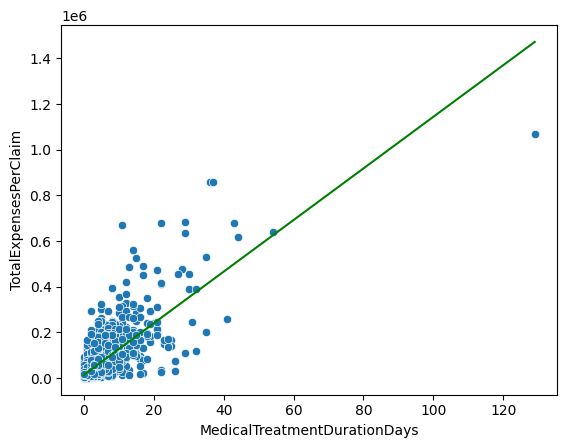

In [56]:
sns.scatterplot(data=HealthCareDataSetGroupedByMedicalClaim, x='MedicalTreatmentDurationDays',y='TotalExpensesPerClaim')

sns.lineplot(data=HealthCareDataSetGroupedByMedicalClaim, x=HealthCareDataSetGroupedByMedicalClaim['MedicalTreatmentDurationDays'], y=results.fittedvalues,color='green')


#### 4.3. Goodness of Fit
#### We need to determine how accurate is the model we have just fit. To do so we compute the $R^2$

In [57]:
results.rsquared

0.6170272499644496

In [58]:
100*results.rsquared

61.70272499644496

#### Based on the previous result we conclude that our model is quite good as it is able to explain 61% of the total variability between `MedicalTreatmentDurationDays` and `TotalExpensesPerClaim`